## 🔍 Model Explainability with SHAP

SHAP helps us understand how each feature contributes to a model’s predictions.  
It provides **global feature importance** (overall influence) and **local explanations** (why a specific transaction was classified as fraud or non-fraud).

In [3]:
# Load processed data and models
import joblib

# Load data
X_train_smote = pd.read_csv("../data/preprocessed/X_train_smote.csv")
X_test = pd.read_csv("../data/preprocessed/X_test.csv")

# Load saved models (from 'model' folder)
models = {
    "Logistic Regression": joblib.load("../model/logistic_regression_model.pkl"),
    "Random Forest": joblib.load("../model/random_forest_model.pkl"),
    "Gradient Boosting": joblib.load("../model/gradient_boosting_model.pkl")
}

In [2]:
# Install SHAP if not already installed
# !pip install shap

import shap
import matplotlib.pyplot as plt
import pandas as pd

# Initialize JS visualization in Jupyter
shap.initjs()

### 🔹 Explaining Gradient Boosting Predictions

We’ll focus on the Gradient Boosting model because it has the **highest ROC–AUC**, meaning it’s the most reliable for fraud detection.

In [4]:
# Create SHAP explainer for Gradient Boosting
explainer = shap.Explainer(models['Gradient Boosting'], X_train_smote)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

 99%|===================| 56571/56962 [00:57<00:00]        

### 🔹 Global Feature Importance

This plot shows which features most influence fraud predictions across all transactions.

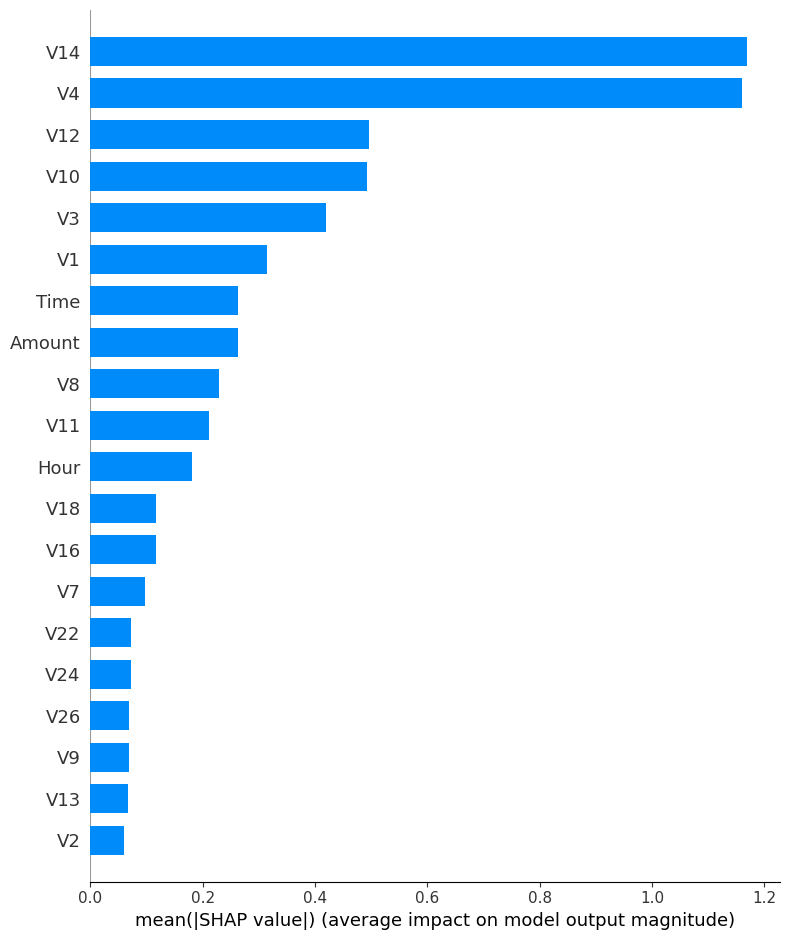

In [5]:
# SHAP summary plot (bar chart)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)

### 🔹 Detailed Feature Impact

The beeswarm plot shows **how feature values affect predictions**:
- Red points → high feature value
- Blue points → low feature value
- Position on x-axis → effect on model output

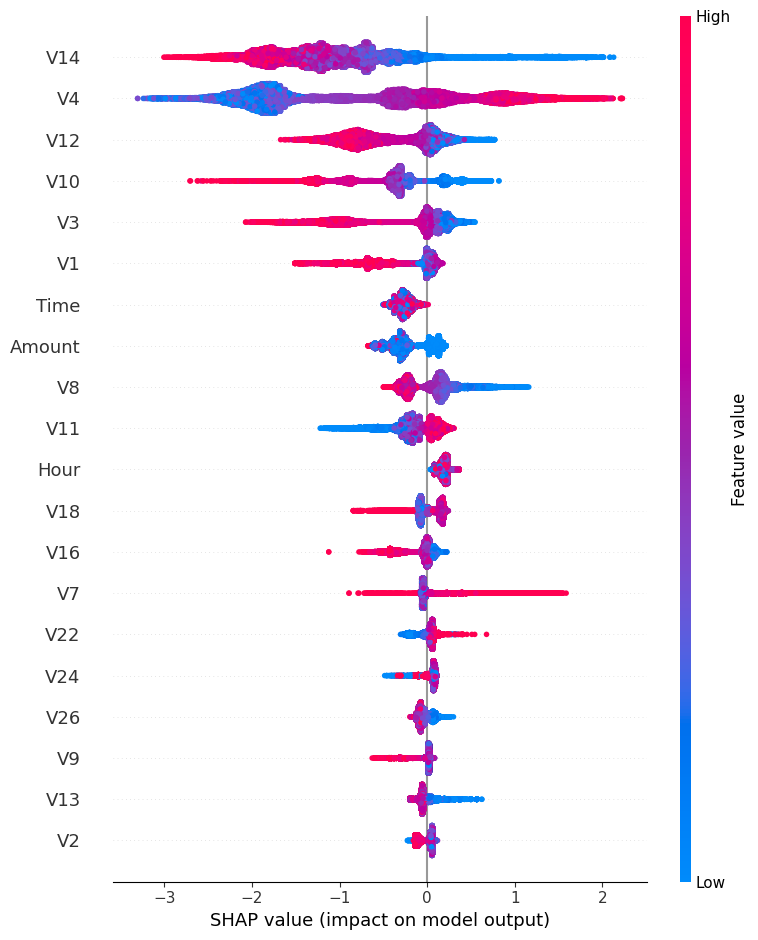

In [6]:
shap.summary_plot(shap_values, X_test)

### 🔹 Local Explanation for a Single Transaction

We can explain why the model predicted a transaction as fraud or non-fraud using SHAP force plots.

In [7]:
# Pick an index of a test transaction
index = 10
shap.force_plot(explainer.expected_value, shap_values[index].values, X_test.iloc[index])

## 🧠 Key Insights from SHAP

- Features like **V17, V14, V12, V10** consistently show high impact — confirming what correlation analysis suggested.  
- Positive SHAP value → increases likelihood of fraud prediction  
- Negative SHAP value → decreases likelihood of fraud prediction  
- SHAP analysis provides **trust and transparency**, helping stakeholders understand why the model flags certain transactions as fraudulent.

In [8]:
import joblib
import shap

# --- Create SHAP explainers ---
explainer_gb = shap.Explainer(models['Gradient Boosting'], X_train_smote)
explainer_rf = shap.Explainer(models['Random Forest'], X_train_smote)
explainer_lr = shap.Explainer(models['Logistic Regression'], X_train_smote)

# --- Save SHAP explainers ---
joblib.dump(explainer_gb, '../model/SHAP_Explainer_Gradient_Boosting.pkl')
joblib.dump(explainer_rf, '../model/SHAP_Explainer_Random_Forest.pkl')
joblib.dump(explainer_lr, '../model/SHAP_Explainer_Logistic_Regression.pkl')

print("✅ All SHAP explainers saved successfully in the 'model/' folder")

✅ All SHAP explainers saved successfully in the 'model/' folder
